In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [3]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


Import and read CSV files

In [3]:
df = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\smalldf.csv')
dftest = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\smalldf.csv')

In [4]:
df

Unnamed: 0  display_id            uuid  document_id_x  timestamp  \
0                0       34922  6288e67b1d54c6        1794259    2600122   
1                1     3982567  f90db73a75332d        1060089  253476258   
2                2     7604922  9853a49f80e2f8        1303771  520980585   
3                3     1439583  e4d4a17cf8c7e6        1667632   86010864   
4                4     3522033  4789ccff327551        1601704  228163963   
...            ...         ...             ...            ...        ...   
442766      442766     9762385  36885fefb74770        2401336  657348844   
442767      442767     9829782  81c06904ae3666        2407625  660535091   
442768      442768    11723724  529cec290ebd2a        2380972  776011771   
442769      442769    11200483  cd1ca2d989c964        2417372  746141033   
442770      442770    11458568  cb94e425c572c7        2422518  759633896   

        platform geo_location  source_id  publisher_id         publish_time  \
0              2    US>TX>623       93.0         407.0  2016-06-14 00:00:00   
1              1    US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   
2              2    US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   
3              2    US>WA>819     7267.0          58.0  2016-06-08 00:00:00   
4              2           US    12705.0        1044.0  2016-06-03 17:00:00   
...          ...          ...        ...           ...                  ...   
442766         2    US>CA>803    10517.0         240.0  2016-06-21 11:00:00   
442767         2    US>NJ>501      553.0         180.0  2016-06-21 12:00:00   
442768         2    US>UT>770     6868.0          41.0  2016-06-21 07:00:00   
442769         2    US>IL>602     3086.0         240.0  2016-06-21 02:00:00   
442770         2    US>CA>825     1570.0          78.0  2016-06-21 15:00:00   

        ...  timestamp_hour  timestamp_minute  timestamp_dayofweek  \
0       ...               4                43                    1   
1       ...               2                24                    4   
2       ...               4                43                    0   
3       ...               3                53                    2   
4       ...              19                22                    3   
...     ...             ...               ...                  ...   
442766  ...              18                35                    1   
442767  ...              19                28                    1   
442768  ...               3                33                    3   
442769  ...              19                15                    2   
442770  ...              23                 0                    2   

               the_publish_time  publish_time_year publish_time_month  \
0       2016-06-14 00:00:00.000             2016.0                6.0   
1       2016-01-23 01:00:00.000             2016.0                1.0   
2       2016-04-14 20:00:00.000             2016.0                4.0   
3       2016-06-08 00:00:00.000             2016.0                6.0   
4       2016-06-03 17:00:00.000             2016.0                6.0   
...                         ...                ...                ...   
442766  2016-06-21 11:00:00.000             2016.0                6.0   
442767  2016-06-21 12:00:00.000             2016.0                6.0   
442768  2016-06-21 07:00:00.000             2016.0                6.0   
442769  2016-06-21 02:00:00.000             2016.0                6.0   
442770  2016-06-21 15:00:00.000             2016.0                6.0   

        publish_time_day  publish_time_hour  publish_time_minute  \
0                   14.0                0.0                  0.0   
1                   23.0                1.0                  0.0   
2                   14.0               20.0                  0.0   
3                    8.0                0.0                  0.0   
4                    3.0               17.0                  0.0   
...                 

In [5]:
top10adid = list(df.groupby('ad_id').sum()['clicked'].sort_values(ascending=False)[0:10])

In [6]:
df['ad_id'].apply(lambda s: s in top10adid)

0         False
1         False
2         False
3         False
4         False
          ...  
442766    False
442767    False
442768    False
442769    False
442770    False
Name: ad_id, Length: 442771, dtype: bool

In [7]:
df['top10ad_id'] = df['ad_id'].apply(lambda s: s in top10adid).astype(int)
df

Unnamed: 0  display_id            uuid  document_id_x  timestamp  \
0                0       34922  6288e67b1d54c6        1794259    2600122   
1                1     3982567  f90db73a75332d        1060089  253476258   
2                2     7604922  9853a49f80e2f8        1303771  520980585   
3                3     1439583  e4d4a17cf8c7e6        1667632   86010864   
4                4     3522033  4789ccff327551        1601704  228163963   
...            ...         ...             ...            ...        ...   
442766      442766     9762385  36885fefb74770        2401336  657348844   
442767      442767     9829782  81c06904ae3666        2407625  660535091   
442768      442768    11723724  529cec290ebd2a        2380972  776011771   
442769      442769    11200483  cd1ca2d989c964        2417372  746141033   
442770      442770    11458568  cb94e425c572c7        2422518  759633896   

        platform geo_location  source_id  publisher_id         publish_time  \
0              2    US>TX>623       93.0         407.0  2016-06-14 00:00:00   
1              1    US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   
2              2    US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   
3              2    US>WA>819     7267.0          58.0  2016-06-08 00:00:00   
4              2           US    12705.0        1044.0  2016-06-03 17:00:00   
...          ...          ...        ...           ...                  ...   
442766         2    US>CA>803    10517.0         240.0  2016-06-21 11:00:00   
442767         2    US>NJ>501      553.0         180.0  2016-06-21 12:00:00   
442768         2    US>UT>770     6868.0          41.0  2016-06-21 07:00:00   
442769         2    US>IL>602     3086.0         240.0  2016-06-21 02:00:00   
442770         2    US>CA>825     1570.0          78.0  2016-06-21 15:00:00   

        ...  timestamp_minute  timestamp_dayofweek         the_publish_time  \
0       ...                43                    1  2016-06-14 00:00:00.000   
1       ...                24                    4  2016-01-23 01:00:00.000   
2       ...                43                    0  2016-04-14 20:00:00.000   
3       ...                53                    2  2016-06-08 00:00:00.000   
4       ...                22                    3  2016-06-03 17:00:00.000   
...     ...               ...                  ...                      ...   
442766  ...                35                    1  2016-06-21 11:00:00.000   
442767  ...                28                    1  2016-06-21 12:00:00.000   
442768  ...                33                    3  2016-06-21 07:00:00.000   
442769  ...                15                    2  2016-06-21 02:00:00.000   
442770  ...                 0                    2  2016-06-21 15:00:00.000   

        publish_time_year  publish_time_month publish_time_day  \
0                  2016.0                 6.0             14.0   
1                  2016.0                 1.0             23.0   
2                  2016.0                 4.0             14.0   
3                  2016.0                 6.0              8.0   
4                  2016.0                 6.0              3.0   
...                   ...                 ...              ...   
442766             2016.0                 6.0             21.0   
442767             2016.0                 6.0             21.0   
442768             2016.0                 6.0             21.0   
442769             2016.0                 6.0             21.0   
442770             2016.0                 6.0             21.0   

        publish_time_hour  publish_time_minute  publish_time_dayofweek  \
0                     0.0                  0.0                     1.0   
1                     1.0                  0.0                     5.0   
2                    20.0                  0.0                     3.0   
3                     0.0                  0.0                     2.0   
4                    17.0         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442771 entries, 0 to 442770
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              442771 non-null  int64  
 1   display_id              442771 non-null  int64  
 2   uuid                    442771 non-null  object 
 3   document_id_x           442771 non-null  int64  
 4   timestamp               442771 non-null  int64  
 5   platform                442771 non-null  int64  
 6   geo_location            442764 non-null  object 
 7   source_id               442765 non-null  float64
 8   publisher_id            442765 non-null  float64
 9   publish_time            377774 non-null  object 
 10  ad_id                   442771 non-null  int64  
 11  clicked                 442771 non-null  int64  
 12  document_id_y           442771 non-null  int64  
 13  campaign_id             442771 non-null  int64  
 14  advertiser_id       

In [9]:
df.clicked.value_counts()

0    357226
1     85545
Name: clicked, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(df['clicked'])
le

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
df.loc[:, "plaform"] = le
df.head()

Unnamed: 0  display_id            uuid  document_id_x  timestamp  platform  \
0           0       34922  6288e67b1d54c6        1794259    2600122         2   
1           1     3982567  f90db73a75332d        1060089  253476258         1   
2           2     7604922  9853a49f80e2f8        1303771  520980585         2   
3           3     1439583  e4d4a17cf8c7e6        1667632   86010864         2   
4           4     3522033  4789ccff327551        1601704  228163963         2   

  geo_location  source_id  publisher_id         publish_time  ...  \
0    US>TX>623       93.0         407.0  2016-06-14 00:00:00  ...   
1    US>VA>544     7744.0        1204.0  2016-01-23 01:00:00  ...   
2    US>MO>616    12705.0        1044.0  2016-04-14 20:00:00  ...   
3    US>WA>819     7267.0          58.0  2016-06-08 00:00:00  ...   
4           US    12705.0        1044.0  2016-06-03 17:00:00  ...   

   timestamp_dayofweek         the_publish_time  publish_time_year  \
0                    1  2016-06-14 00:00:00.000             2016.0   
1                    4  2016-01-23 01:00:00.000             2016.0   
2                    0  2016-04-14 20:00:00.000             2016.0   
3                    2  2016-06-08 00:00:00.000             2016.0   
4                    3  2016-06-03 17:00:00.000             2016.0   

   publish_time_month  publish_time_day publish_time_hour  \
0                 6.0              14.0               0.0   
1                 1.0              23.0               1.0   
2                 4.0              14.0              20.0   
3                 6.0               8.0               0.0   
4                 6.0               3.0              17.0   

   publish_time_minute  publish_time_dayofweek  top10ad_id  plaform  
0                  0.0                     1.0           0        0  
1                  0.0                     5.0           0        0  
2                  0.0                     3.0           0        0  
3                  0.0                     2.0           0        0  
4                  0.0                     4.0           0        0  

[5 rows x 31 columns]

In [12]:
train, test = statsmodels_train_test_split(df)

In [13]:
train.head()

display_id            uuid  document_id_x  timestamp  platform  \
9972         50254  171fe518e9dff8        1179111    3910161         3   
135749     6820181  cb982b59cc77da        1061689  469418166         3   
360826     4065941  840a6ab15b0cc5        1690147  258819981         1   
54678       676680  5db7dc6c0349a9        1804102   47018652         1   
282270    14330953  4751213efffc71         813244  941359177         2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
9972          CA>AB     7369.0         867.0                  NaN  326712   
135749    US>AL>606     7736.0         450.0  2015-12-29 00:00:00  241007   
360826    US>PA>504     9606.0        1066.0  2016-06-09 15:00:00  180923   
54678     US>NY>501     4935.0         180.0  2016-06-14 04:00:00  131543   
282270        US>CA     1209.0         875.0  2014-12-12 00:00:00  123742   

        ...         the_publish_time  publish_time_year  publish_time_month  \
9972    ...                      NaN                NaN                 NaN   
135749  ...  2015-12-29 00:00:00.000             2015.0                12.0   
360826  ...  2016-06-09 15:00:00.000             2016.0                 6.0   
54678   ...  2016-06-14 04:00:00.000             2016.0                 6.0   
282270  ...  2014-12-12 00:00:00.000             2014.0                12.0   

        publish_time_day publish_time_hour  publish_time_minute  \
9972                 NaN               NaN                  NaN   
135749              29.0               0.0                  0.0   
360826               9.0              15.0                  0.0   
54678               14.0               4.0                  0.0   
282270              12.0               0.0                  0.0   

        publish_time_dayofweek  top10ad_id  plaform  Unnamed: 0  
9972                       NaN           0        0        9972  
135749                     1.0           0        0      135749  
360826                     3.0           0        0      360826  
54678                      1.0           0        0       54678  
282270                     4.0           0        0      282270  

[5 rows x 31 columns]

In [14]:
test.head()

display_id            uuid  document_id_x  timestamp  platform  \
278153     3295957  e3eef05fc55bc1        1715559  216971505         2   
431898     9924221  b77716da33c2f3         484460  664978828         2   
166723     4508393  9ef7b41bacaf59        2103959  296156425         2   
290903     6644207  6b963c140bef43        2212111  455656699         3   
335993     9075163  ffbb574364c1a1        2330854  610119390         2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
278153        MX>27     6698.0         784.0  2016-06-10 17:00:00  158473   
431898           US     7031.0         637.0  2015-12-31 00:00:00  134615   
166723    US>SC>520     7367.0         874.0  2016-06-17 09:00:00   82672   
290903        CA>NS      752.0          43.0  2016-06-18 20:00:00  327978   
335993    US>CA>807     5717.0         433.0  2016-06-20 16:00:00  294434   

        ...         the_publish_time  publish_time_year  publish_time_month  \
278153  ...  2016-06-10 17:00:00.000             2016.0                 6.0   
431898  ...  2015-12-31 00:00:00.000             2015.0                12.0   
166723  ...  2016-06-17 09:00:00.000             2016.0                 6.0   
290903  ...  2016-06-18 20:00:00.000             2016.0                 6.0   
335993  ...  2016-06-20 16:00:00.000             2016.0                 6.0   

        publish_time_day publish_time_hour  publish_time_minute  \
278153              10.0              17.0                  0.0   
431898              31.0               0.0                  0.0   
166723              17.0               9.0                  0.0   
290903              18.0              20.0                  0.0   
335993              20.0              16.0                  0.0   

        publish_time_dayofweek  top10ad_id  plaform  Unnamed: 0  
278153                     4.0           0        0      278153  
431898                     3.0           0        0      431898  
166723                     4.0           0        0      166723  
290903                     5.0           0        0      290903  
335993                     0.0           0        0      335993  

[5 rows x 31 columns]

In [16]:
formula = 'clicked ~ C(platform) + C(top10ad_id) + C(timestamp_day)'

In [27]:
formula = 'clicked ~ C(platform) + C(top10ad_id) + C(timestamp_day)'
model = smf.logit(formula=formula, data=train, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.489027
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                clicked   No. Observations:               332078
Model:                          Logit   Df Residuals:                   332062
Method:                           MLE   Df Model:                           15
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                0.003827
Time:                        13:02:33   Log-Likelihood:            -1.6240e+05
converged:                       True   LL-Null:                   -1.6302e+05
Covariance Type:            nonrobust   LLR p-value:                9.790e-257
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.5650      0.017    -90.324      0.000      -1.599      -1.531
C(platform)[T.2]           0.3120      0.010     32.657      0.000       0.293       0.331
C(platform)[T.3]           0.0160      0.014      1.150      0.250      -0.011       0.043
C(timestamp_day)[T.15]     0.0021      0.023      0.092      0.927      -0.043       0.047
C(timestamp_day)[T.16]    -0.0438      0.023     -1.913      0.056      -0.089       0.001
C(timestamp_day)[T.17]    -0.0178      0.023     -0.775      0.438      -0.063       0.027
C(timestamp_day)[T.18]    -0.0039      0.024     -0.165      0.869      -0.051       0.043
C(timestamp_day)[T.19]    -0.0048      0.024     -0.200      0.841      -0.052       0.043
C(timestamp_day)[T.20]     0.0083      0.023      0.368      0.713      -0.036       0.052
C(timestamp_day)[T.21]    -0.0344      0.023     -1.508      0.131      -0.079       0.010
C(timestamp_day)[T.22]    -0.0216      0.023     -0.955      0.340      -0.066       0.023
C(timestamp_day)[T.23]     0.0094      0.023      0.416      0.677      -0.035       0.054
C(timestamp_day)[T.24]     0.0002      0.023      0.007      0.995      -0.044       0.045
C(timestamp_day)[T.25]     0.0108      0.023      0.463      0.644      -0.035       0.057
C(timestamp_day)[T.26]     0.0301      0.023      1.299      0.194      -0.015       0.075
C(timestamp_day)[T.27]    -0.0616      0.041     -1.496      0.135      -0.142       0.019
==========================================================================================
"""

In [18]:
y_pred_test = model.predict(test)
y_pred_test

278153    0.214714
431898    0.216312
166723    0.219132
290903    0.174533
335993    0.216312
            ...   
365141    0.168076
390761    0.227433
307382    0.173237
324736    0.168076
245734    0.172959
Length: 110693, dtype: float64

In [19]:
predictions = np.round(y_pred_test)

In [20]:
predictions

278153    0.0
431898    0.0
166723    0.0
290903    0.0
335993    0.0
         ... 
365141    0.0
390761    0.0
307382    0.0
324736    0.0
245734    0.0
Length: 110693, dtype: float64

In [21]:
confusion_matrix(test['clicked'], predictions)

array([[89323,     0],
       [21370,     0]], dtype=int64)

In [4]:
sns.regplot(x='platform', y='clicked', data=df, logistic=True)


NameError: name 'df' is not defined

KeyboardInterrupt: 

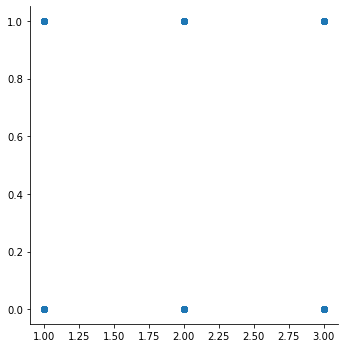

In [26]:
sns.lmplot(x="platform", logistic=True, y="clicked", data=df)
plt.show()

In [12]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(df['clicked'])
le

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
df.loc[:,'clicked'] = le
df.head()

Unnamed: 0  display_id            uuid  document_id_x  timestamp  platform  \
0           0       34922  6288e67b1d54c6        1794259    2600122         2   
1           1     3982567  f90db73a75332d        1060089  253476258         1   
2           2     7604922  9853a49f80e2f8        1303771  520980585         2   
3           3     1439583  e4d4a17cf8c7e6        1667632   86010864         2   
4           4     3522033  4789ccff327551        1601704  228163963         2   

  geo_location  source_id  publisher_id         publish_time  ...  \
0    US>TX>623       93.0         407.0  2016-06-14 00:00:00  ...   
1    US>VA>544     7744.0        1204.0  2016-01-23 01:00:00  ...   
2    US>MO>616    12705.0        1044.0  2016-04-14 20:00:00  ...   
3    US>WA>819     7267.0          58.0  2016-06-08 00:00:00  ...   
4           US    12705.0        1044.0  2016-06-03 17:00:00  ...   

   timestamp_hour  timestamp_minute  timestamp_dayofweek  \
0               4                43                    1   
1               2                24                    4   
2               4                43                    0   
3               3                53                    2   
4              19                22                    3   

          the_publish_time  publish_time_year publish_time_month  \
0  2016-06-14 00:00:00.000             2016.0                6.0   
1  2016-01-23 01:00:00.000             2016.0                1.0   
2  2016-04-14 20:00:00.000             2016.0                4.0   
3  2016-06-08 00:00:00.000             2016.0                6.0   
4  2016-06-03 17:00:00.000             2016.0                6.0   

   publish_time_day  publish_time_hour  publish_time_minute  \
0              14.0                0.0                  0.0   
1              23.0                1.0                  0.0   
2              14.0               20.0                  0.0   
3               8.0                0.0                  0.0   
4               3.0               17.0                  0.0   

   publish_time_dayofweek  
0                     1.0  
1                     5.0  
2                     3.0  
3                     2.0  
4                     4.0  

[5 rows x 29 columns]

In [15]:
df.clicked.value_counts()

0    357226
1     85545
Name: clicked, dtype: int64

In [22]:
df.groupby('ad_id').sum()['clicked'].sort_values(ascending=False)

ad_id
175214    505
173130    473
303990    457
3314      427
92759     424
         ... 
222416      0
222245      0
221672      0
221181      0
77          0
Name: clicked, Length: 7263, dtype: int64

In [23]:
df.groupby('ad_id').sum()['clicked'].sort_values(ascending=False)[0:10]

ad_id
175214    505
173130    473
303990    457
3314      427
92759     424
130952    421
184220    398
84109     396
228959    372
26711     369
Name: clicked, dtype: int64

In [18]:
df['top10_ad_id'] = df['ad_id'] in list(df.groupby('ad_id').sum()['clicked'].sort_values(ascending=False)[0:10])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
df['top10_ad_id'] = df['ad_id'] in list ([175214])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
df['geo_location'].apply(lambda s: fxn(s))

NameError: name 'fxn' is not defined

In [30]:
df['geo_location'].apply(lambda s: split('>')[1])

NameError: name 'split' is not defined

In [4]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442771 entries, 0 to 442770
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              442771 non-null  int64  
 1   display_id              442771 non-null  int64  
 2   uuid                    442771 non-null  object 
 3   document_id_x           442771 non-null  int64  
 4   timestamp               442771 non-null  int64  
 5   platform                442771 non-null  int64  
 6   geo_location            442764 non-null  object 
 7   source_id               442765 non-null  float64
 8   publisher_id            442765 non-null  float64
 9   publish_time            377774 non-null  object 
 10  ad_id                   442771 non-null  int64  
 11  clicked                 442771 non-null  int64  
 12  document_id_y           442771 non-null  int64  
 13  campaign_id             442771 non-null  int64  
 14  advertiser_id       

In [6]:
train.head()

display_id            uuid  document_id_x  timestamp  platform  \
79444      5298356  61a8249b8b679a         879466  343030874         2   
105093     8015122  9446da29d5107f        1179111  554988333         2   
429883     7762059  7bd12a1cccc36d        1256566  538406774         3   
146418    12326500  17ddaefd987760        2222341  821094465         1   
274420     7375237  fd1dac0bcb7757        2250389  506078848         3   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
79444         FR>A8     1032.0        1025.0  2015-03-23 06:00:00  184373   
105093        PL>86     7369.0         867.0                  NaN   75862   
429883    US>OH>515     7736.0         450.0  2016-07-13 00:00:00  304040   
146418    US>MO>609     8610.0        1142.0  2016-06-18 09:00:00    8744   
274420    US>WV>598      105.0         206.0  2016-06-19 16:00:00   60034   

        ...  timestamp_minute  timestamp_dayofweek         the_publish_time  \
79444   ...                17                    5  2015-03-23 06:00:00.000   
105093  ...                 9                    0                      NaN   
429883  ...                33                    0  2016-07-13 00:00:00.000   
146418  ...                 4                    3  2016-06-18 09:00:00.000   
274420  ...                34                    0  2016-06-19 16:00:00.000   

        publish_time_year publish_time_month  publish_time_day  \
79444              2015.0                3.0              23.0   
105093                NaN                NaN               NaN   
429883             2016.0                7.0              13.0   
146418             2016.0                6.0              18.0   
274420             2016.0                6.0              19.0   

        publish_time_hour  publish_time_minute  publish_time_dayofweek  \
79444                 6.0                  0.0                     0.0   
105093                NaN                  NaN                     NaN   
429883                0.0                  0.0                     2.0   
146418                9.0                  0.0                     5.0   
274420               16.0                  0.0                     6.0   

        Unnamed: 0  
79444        79444  
105093      105093  
429883      429883  
146418      146418  
274420      274420  

[5 rows x 29 columns]

In [7]:
test.head()

display_id            uuid  document_id_x   timestamp  platform  \
195185    15891990  b4b0abf8c536a5        1379970  1064264527         2   
306408    10568440  6e43b805ae965a        2344581   712759599         3   
35029       149439  48da27ed54353e        1760989    15088201         2   
220772    16048320  b73a0701478be7         895645  1073317737         1   
57409     13927407  3f4ed5e1cb2b32        1827718   917698505         1   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
195185    US>CA>807    10030.0        1089.0  2016-04-14 00:00:00   95112   
306408    US>WI>658    11733.0         828.0  2016-06-20 18:00:00  276173   
35029     US>MI>505       18.0        1050.0  2016-06-13 11:00:00   93303   
220772    US>NY>501     7132.0         850.0                  NaN  153383   
57409     US>NH>506     9874.0        1228.0  2016-06-14 18:00:00   89630   

        ...  timestamp_minute  timestamp_dayofweek         the_publish_time  \
195185  ...                37                    6  2016-04-14 00:00:00.000   
306408  ...                59                    2  2016-06-20 18:00:00.000   
35029   ...                11                    1  2016-06-13 11:00:00.000   
220772  ...                 8                    6                      NaN   
57409   ...                54                    4  2016-06-14 18:00:00.000   

        publish_time_year publish_time_month  publish_time_day  \
195185             2016.0                4.0              14.0   
306408             2016.0                6.0              20.0   
35029              2016.0                6.0              13.0   
220772                NaN                NaN               NaN   
57409              2016.0                6.0              14.0   

        publish_time_hour  publish_time_minute  publish_time_dayofweek  \
195185                0.0                  0.0                     3.0   
306408               18.0                  0.0                     0.0   
35029                11.0                  0.0                     0.0   
220772                NaN                  NaN                     NaN   
57409                18.0                  0.0                     1.0   

        Unnamed: 0  
195185      195185  
306408      306408  
35029        35029  
220772      220772  
57409        57409  

[5 rows x 29 columns]

In [8]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442771 entries, 0 to 442770
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              442771 non-null  int64  
 1   display_id              442771 non-null  int64  
 2   uuid                    442771 non-null  object 
 3   document_id_x           442771 non-null  int64  
 4   timestamp               442771 non-null  int64  
 5   platform                442771 non-null  int64  
 6   geo_location            442764 non-null  object 
 7   source_id               442765 non-null  float64
 8   publisher_id            442765 non-null  float64
 9   publish_time            377774 non-null  object 
 10  ad_id                   442771 non-null  int64  
 11  clicked                 442771 non-null  int64  
 12  document_id_y           442771 non-null  int64  
 13  campaign_id             442771 non-null  int64  
 14  advertiser_id       

In [18]:
formula = 'clicked ~ C(platform) + C(ad_id)'
model = smf.logit(formula = formula, data=train).fit()
model.summary()

MemoryError: Unable to allocate 17.2 GiB for an array with shape (332078, 6947) and data type float64

In [ ]:
# this is equivalent to 
#formula = 'species ~ C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g  + C(sex)'

y, X = penguins.species, penguins.drop(columns='species')
X = pd.get_dummies(X, drop_first=True)